In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
import kaggle

In [3]:
!kaggle datasets download -d kunal28chaturvedi/covid19-and-its-impact-on-students


  0%|          | 0.00/20.8k [00:00<?, ?B/s]
100%|##########| 20.8k/20.8k [00:00<00:00, 1.12MB/s]


In [4]:
from zipfile import ZipFile
file_name = 'covid19-and-its-impact-on-students.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

df = pd.read_csv('dataset.csv')

In [6]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [7]:
df.dtypes

ID                                                                                     object
Region of residence                                                                    object
Age of Subject                                                                          int64
Time spent on Online Class                                                            float64
Rating of Online Class experience                                                      object
Medium for online class                                                                object
Time spent on self study                                                              float64
Time spent on fitness                                                                 float64
Time spent on sleep                                                                   float64
Time spent on social media                                                            float64
Prefered social media platform                              

In [8]:
df.shape

(1182, 19)

In [9]:
df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [10]:
# Verbose Column names, let's change them.
# Make column names to shorter.

df = df.rename(columns={
    "Region of residence":"Region",
    "Age of Subject": "Age",
    "Time spent on Online Class":"Time_class",
    "Rating of Online Class experience":"Rate_class",
    "Medium for online class":"Mediumforclass",
    "Time spent on self study":"Time_selfstudy",
    "Time spent on fitness":"Time_fitness",
    "Time spent on sleep":"Time_sleep",
    "Time spent on social media":"Time_socmed",
    "Prefered social media platform":"Fav_socmed",
    "Time spent on TV":"Time_tv",
    "Number of meals per day":"Meal_count",
    "Change in your weight":"Weight_change",
    "Health issue during lockdown":"Health_issue",
    "Stress busters":"Stress_reliever",
    "Time utilized":"Time_satisfaction",
    "Do you find yourself more connected with your family, close friends , relatives  ?":"Social_connection",
    "What you miss the most":"Missed_activity"
})

In [11]:
df.isnull().sum()

ID                    0
Region                0
Age                   0
Time_class            0
Rate_class           24
Mediumforclass       51
Time_selfstudy        0
Time_fitness          0
Time_sleep            0
Time_socmed           0
Fav_socmed            0
Time_tv               0
Meal_count            0
Weight_change         0
Health_issue          0
Stress_reliever       0
Time_satisfaction     0
Social_connection     0
Missed_activity       0
dtype: int64

In [12]:
#Since the number of missing data is relatively small compared to total rows, we can safely drop them.
#I did not impute the data as missing medium_class could mean the students dont attend classes at all. 

df.dropna(inplace=True)
df.drop(columns='ID', axis=1,inplace=True)

In [13]:
#df.isnull().sum()

In [14]:
df.shape

(1131, 18)

In [15]:
df.describe()

,Age,Time_class,Time_selfstudy,Time_fitness,Time_sleep,Time_socmed,Meal_count
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,20.124668,3.298895,2.919540,0.761892,7.853492,2.355217,2.925729
std,5.504095,2.079631,2.131549,0.722136,1.598477,1.752480,0.826423
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,8.750000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


I think Time_satisfaction can be used to represent mental health status

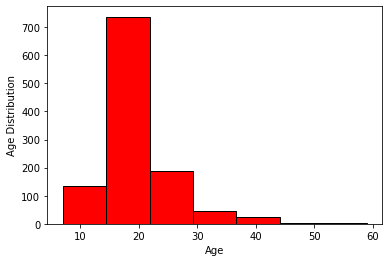

In [59]:
#histogram of age

plt.hist(df['Age'], bins = 7, color = 'red',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Age Distribution')
plt.show()

<AxesSubplot:xlabel='Rate_class', ylabel='count'>

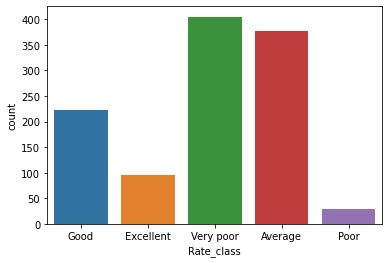

In [17]:
#Countplot - Rate_class
sns.countplot(x="Rate_class", data = df)
plt.show()

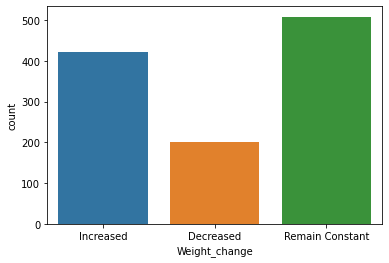

In [58]:
#Countplot - Weight_change

sns.countplot(x="Weight_change", data = df)
plt.show()

In [19]:
print(df['Time_satisfaction'].value_counts())
#50% says they utilized their time in a good way
print('\n')
print(df['Fav_socmed'].value_counts())

NO     582
YES    549
Name: Time_satisfaction, dtype: int64


Instagram    335
Whatsapp     321
Youtube      306
Linkedin      57
Facebook      50
Twitter       25
None          16
Snapchat       8
Reddit         5
Telegram       3
Talklife       1
Quora          1
WhatsApp       1
None           1
Elyment        1
Name: Fav_socmed, dtype: int64


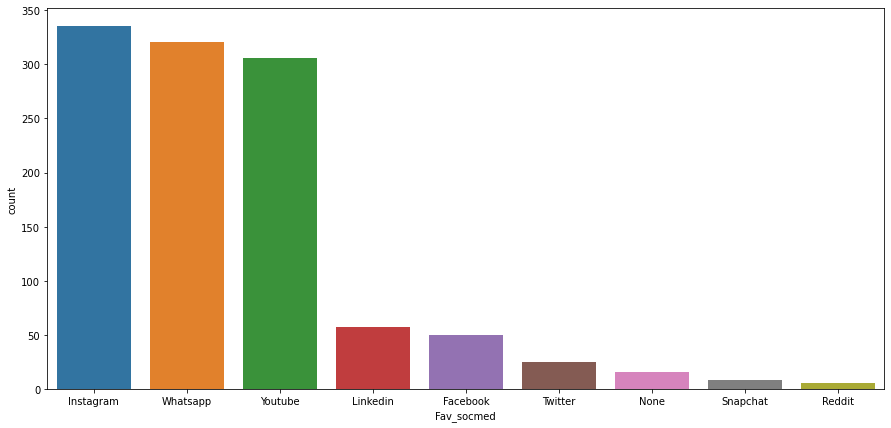

In [57]:
plt.figure(figsize = (15,7))
socmed=['Instagram','Whatsapp','Youtube','Linkedin','Facebook','Twitter','None','Snapchat','Reddit']
sns.countplot(x="Fav_socmed", data = df, order = socmed)
plt.show()

In [21]:
!pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

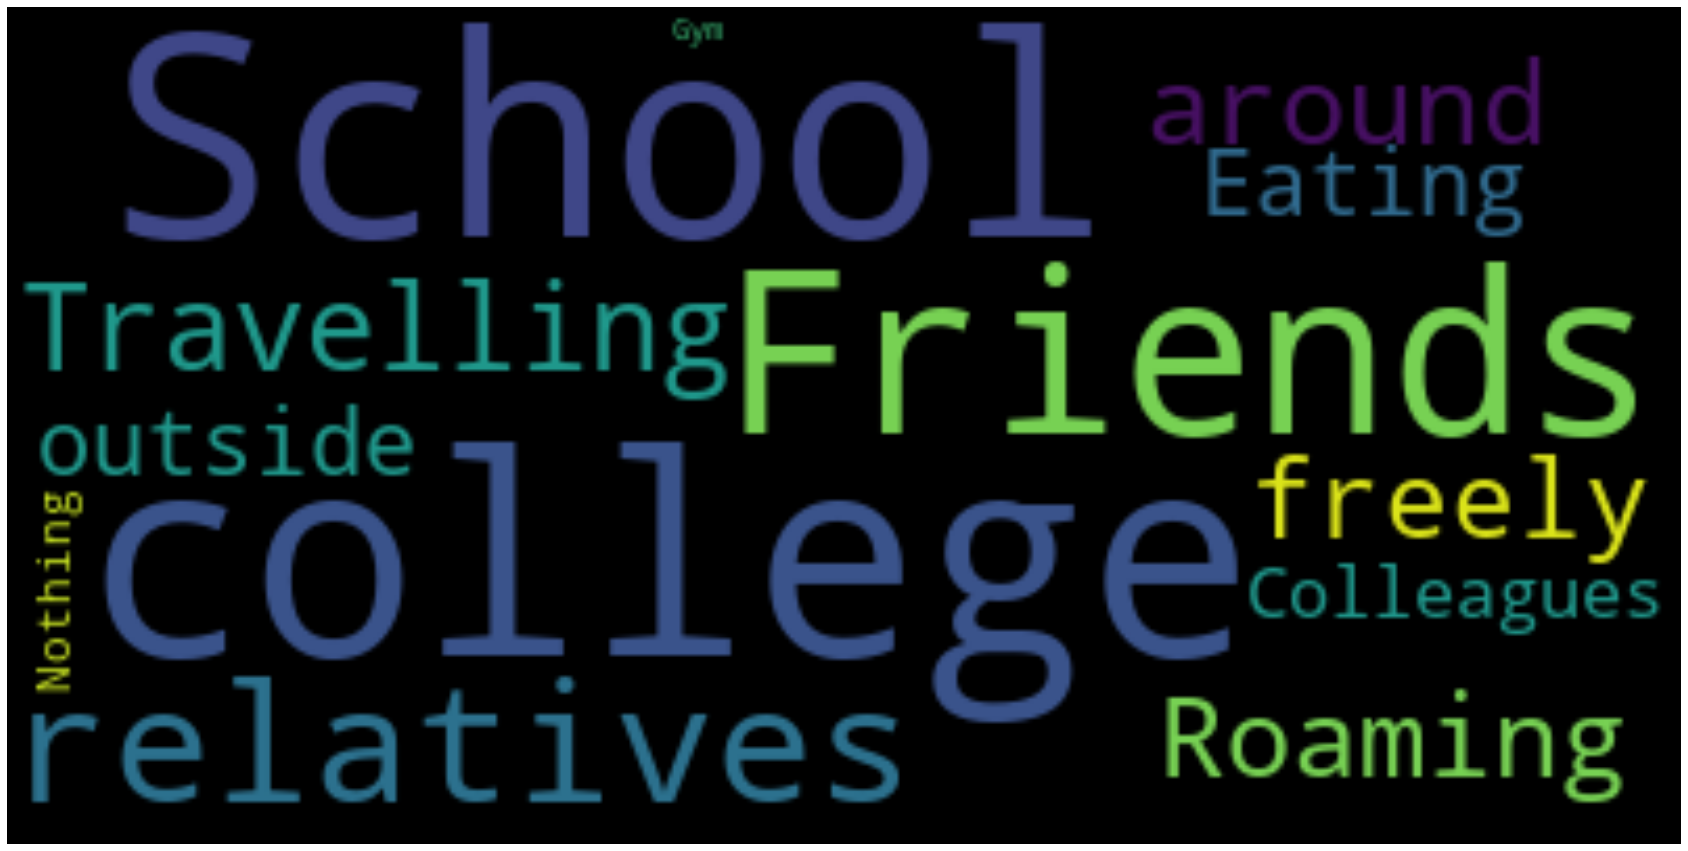

In [22]:
#Things that they missed during COVID

from wordcloud import WordCloud
text = df['Missed_activity'].to_list()
text3 = ' '.join(text)

activity_cloud = WordCloud(collocations = False, max_words=5000, contour_width=3, contour_color='steelblue',min_font_size=6).generate(text3)
plt.figure( figsize=(30,20))
plt.imshow(activity_cloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

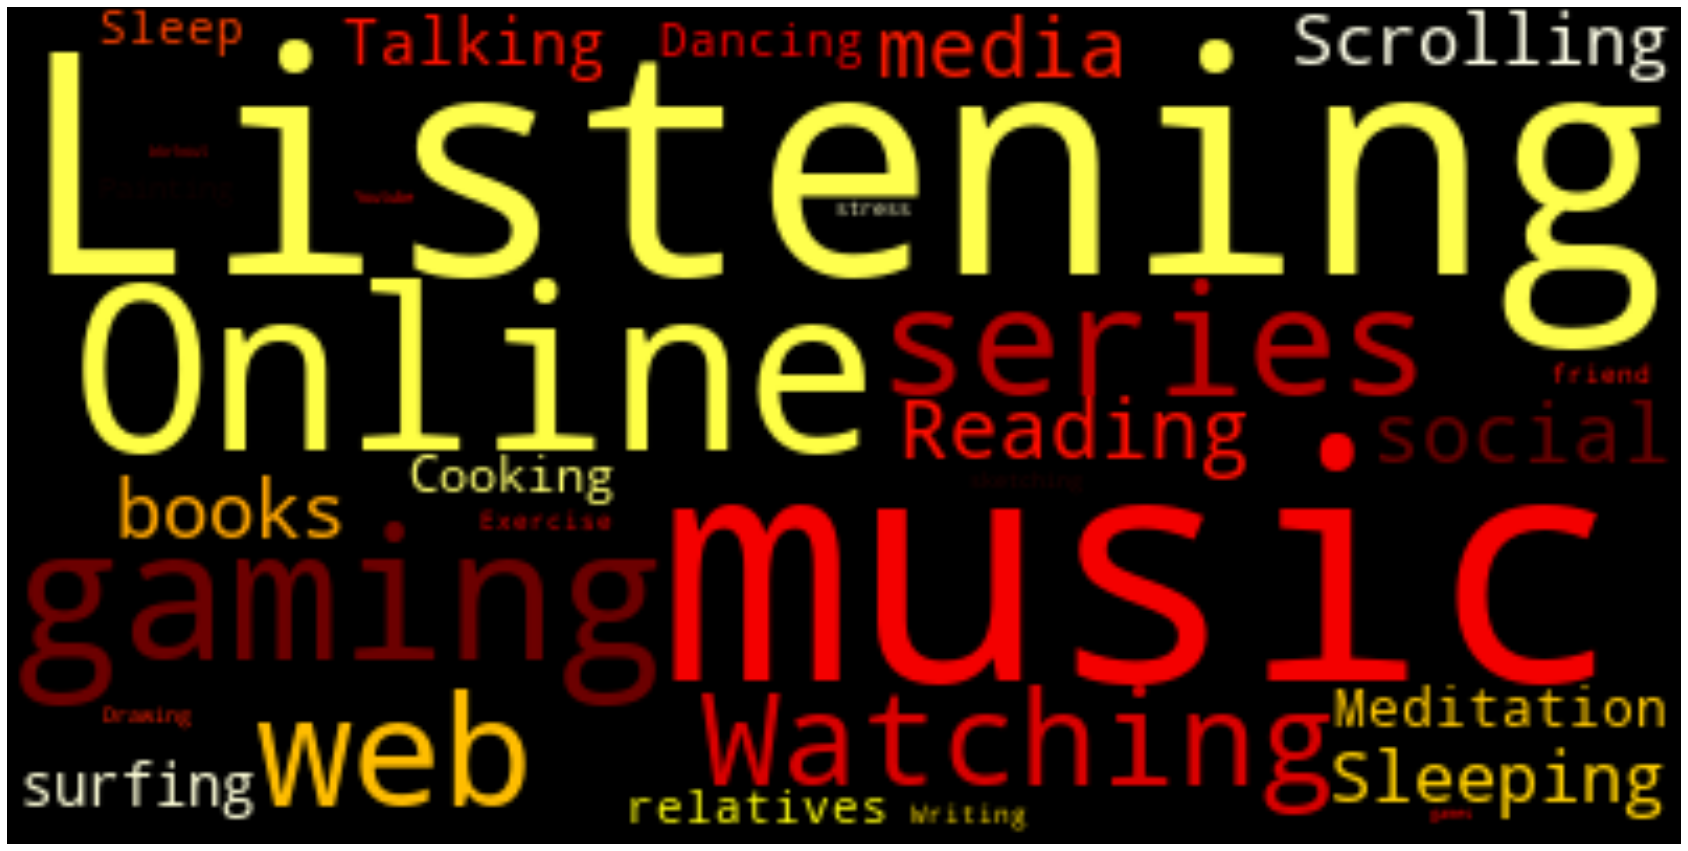

In [23]:
#Things that they do to reduce stress

from wordcloud import WordCloud
text = df['Stress_reliever'].to_list()
text3 = ' '.join(text)

activity_cloud = WordCloud(collocations = False, max_words=5000, contour_width=3, background_color = 'black',colormap = 'hot').generate(text3)
plt.figure( figsize=(30,20))
plt.imshow(activity_cloud, interpolation = 'bilinear')
plt.axis('off')

In [66]:
round(df['Time_class'].mean(),3)

3.299

In [70]:
#Those who said poor and very poor classes, how many hours were spent in class?

poor_class = df.loc[((df['Rate_class'] == 'Very poor') | (df['Rate_class'] == 'Poor')), 'Time_class']

In [81]:
print(poor_class.mean())
print('\n')
print(poor_class.unique())

2.83


[ 7.    3.    0.    2.    1.    5.    4.    6.    1.5   0.1   0.5   9.
  8.    0.75  0.7  10.  ]


In [82]:
# Let's compare with good rating class

good_class = df.loc[((df['Rate_class'] == 'Good') | (df['Rate_class'] == 'Excellent')), 'Time_class']
print(good_class.mean())
print('\n')
print(good_class.unique())

3.585423197492163


[ 2.    0.    3.    1.    4.    5.    6.    7.    8.    5.5   2.5   0.75
  3.5  10.    9.    7.5 ]


In [95]:
good_class.mode()

0    4.0
dtype: float64

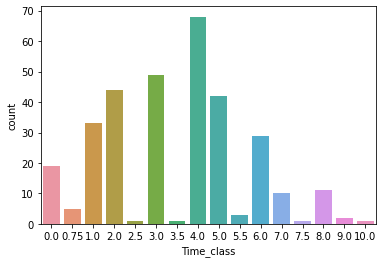

In [77]:
sns.countplot(x=good_class, data = df)
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


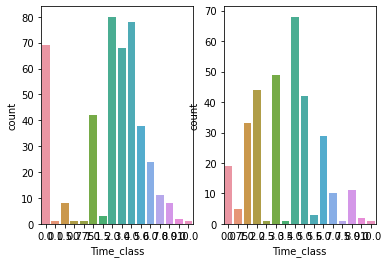

In [88]:
fig, ax =plt.subplots(1,2)
sns.countplot(poor_class, data = df, ax=ax[0])
sns.countplot(good_class, data =  df, ax=ax[1])
#fig.show()
plt.show()

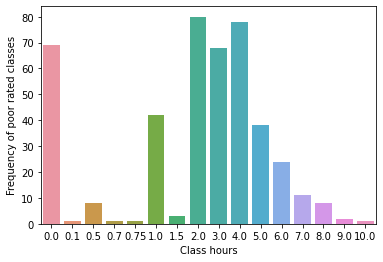

In [85]:
sns.countplot(x=poor_class, data = df)
plt.xlabel('Class hours')
plt.ylabel('Frequency of poor rated classes')
plt.show()

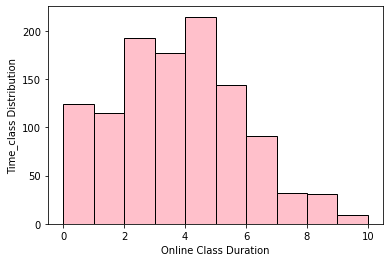

In [56]:
# Time_class distribution

plt.hist(df['Time_class'], color = 'pink',edgecolor='black')

plt.xlabel('Online Class Duration')
plt.ylabel('Time_class Distribution')
plt.show()

In [ ]:
#For those that said online class quality is very poor and good, what is their time spent in class
rcParams['figure.figsize'] = 15,8
sns.countplot(x = 'Time_class', hue = 'Rate_class',palette="bright",data = quality_class)

Classes are generally 2 - 5 hours long.
Classes with less than 1 hour duration is rated as very poor. 

In [ ]:
# Time_class vs Time_self study

sns.barplot(x = 'Time_class', y = 'Time_selfstudy', data = quality_class)

#Even with long class hours, students still self study a lot.

In [ ]:
# I am interested in Age and Time_class

plt.figure(figsize = (15,7))
sns.boxplot(x='Time_class', y='Age', data=df)
plt.show()

It is common that students in school years and in higher education have more class hours,  with those in higher education classes can be up to 10 hours. 
Those above 40 years old generally have less than 6 hours of class. 

# Physical Health:Fitness, Meal_count, Health issue, Time_sleep, Weight changes

In [ ]:
df.columns

In [ ]:
df_phy = df[['Time_fitness', 'Time_sleep','Meal_count', 'Weight_change', 'Health_issue', 'Time_class', 'Time_satisfaction']]
df_phy

In [ ]:
#Fitness vs class hours
#Fitness hours does not change much across different class hours
#Those who don't do exercises typically are either increased in weight or remian constant.
#It is also interesting to see that with an hour of fitness, most students' weight remain constant.

palette_colors = {"Increased": "red", "Decreased": "black", "Remain Constant":"pink"}
sns.scatterplot(x = 'Time_class', y = 'Time_fitness', hue = 'Weight_change', palette = palette_colors, s = 150,data = df_phy)

In [ ]:

sns.countplot( x = 'Time_fitness', hue = 'Time_satisfaction', data = df_phy)

In [ ]:
# PairGrid object with hue
graph = sns.PairGrid(df, hue ='Time_satisfaction')
# type of graph for diagonal
graph = graph.map_diag(plt.hist)
# type of graph for non-diagonal
graph = graph.map_offdiag(plt.scatter)
# to add legends
graph = graph.add_legend()
# to show
plt.show()

This dataset is a mean to explore what the students (with a high age range) feel during COVID years. The number of students who feel that they use their time in a satisfactory way is approximately 50%, this satisfaction is also seen distributed almost equally in all nemurical data.

# Saving tables to excel file for visualisation in Tableau

In [ ]:
#Pick a file name

Health = "Table Health.xlsx"

#Convert to xlsx.
df_phy.to_excel(Health)
print("Conversion finished")

In [ ]:
df.columns

In [ ]:
df_class = df[['Age', 'Time_class', 'Rate_class', 'Mediumforclass',
       'Time_selfstudy','Time_satisfaction']]

Class = "Table Class.xlsx"

df_class.to_excel(Class)
print("Conversion finished")

In [ ]:
df_act = df[['Age','Time_socmed','Fav_socmed', 'Time_tv','Social_connection','Time_satisfaction']]

act = "Table Activities.xlsx"

df_act.to_excel(act)
print("Conversion finished")